# Ironhack MidBootcamp project - Data Analytics Part Time Bootcamp 
## Step 1: presentation 
### Exploring Mushrrom dataset from Kaggle 
##### link: (https://www.kaggle.com/datasets/vishalpnaik/mushroom-classification-edible-or-poisonous?resource=download)

In [63]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
# Import Dependencies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
##from imblearn.over_sampling import SMOTE
##from imblearn.under_sampling import TomekLinks


from scipy.stats import boxcox
from sklearn.model_selection import GridSearchCV, StratifiedKFold


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

%matplotlib inline

In [65]:
# Read CSV 
df = pd.read_csv("mushroom.csv")
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


# Dataset Description 
## Feature Explanation and values
- cap-diameter: Metrical - Float number in cm
- cap-shape: Nominal - bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
- cap-surface: Nominal - fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
- cap-color: Nominal - brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
- does-bruise-bleed: Nominal - bruises-or-bleeding=t, no=f
- gill-attachment: Nominal - adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
- gill-spacing: Nominal - close=c, distant=d, none=f
- gill-color: Nominal - see cap-color + none=f
- stem-height: Metrical - Float number in cm
- stem-width: Metrical - Float number in mm
- stem-root: Nominal - bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
- stem-surface: Nominal - see cap-surface + none=f
- stem-color: Nominal - see cap-color + none=f
- veil-type: Nominal - partial=p, universal=u
- veil-color: Nominal - see cap-color + none=f
- has-ring: Nominal - ring=t, none=f
- ring-type: Nominal - cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
- spore-print-color: Nominal - see cap color
- habitat: Nominal - grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
- season: Nominal - spring=s, summer=u, autumn=a, winter=w

## Target Feature 
#### class 
##### Values: poisonous=p, edible=e (binary)

In [66]:
# Testing this out 
cap_shapes = df["cap-shape"].unique()
cap_shapes

# Of course numerical variables are continous so we get a lot of unique values 
###stem_width = df["stem-width"].unique()
###stem_width

array(['x', 'f', 'p', 'b', 'c', 's', 'o'], dtype=object)

In [67]:
# Checking for features, unique values, NaNs and basic stats, also balanced or imablanced classes for classification. 
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [68]:
# Quantify the volume of NaNs
df.isna().sum() 

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# Conclusions 
Might confidently drop some columns because of the rarety of their actual observance, thus the amount of nan values. See graph in presentation. 
These are:
- veil-type: 57892 nans 
- veil-color: 53656 nans
- spore-print-color: 54715 nans - ?% of the total observance
- stem-root: 51538 nans 


### How do i write a python thing that tell me the % of the total to justify here jejje? 

In [80]:
df.drop(columns = ["veil-type", "veil-color", "spore-print-color", "stem-root"], axis=0, inplace=True)
#df.columns
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,y,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,y,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,y,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,y,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,y,w,t,p,d,w


In [81]:
# Quantify the volume of NaNs after drops
df.isna().sum() 

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-surface            38124
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [82]:
df.shape

(61069, 17)

### Check for duplicates?

In [83]:
df.drop_duplicates()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,y,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,y,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,y,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,y,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,y,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,y,f,f,d,u


In [84]:
df.shape ## NO DUPLICATES!!!!

(61069, 17)

##### Filling the NaNs will be done in preprocessing with KNN algorith. 
There's NaNs in some cathegorical variables. Need to be filled with KNN. 
Im specially interested in the variables that include:
- gill-attachment: 9884 nans 
- gill-spacing: 25063 nans (this might be problematic)

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


<Axes: xlabel='class', ylabel='count'>

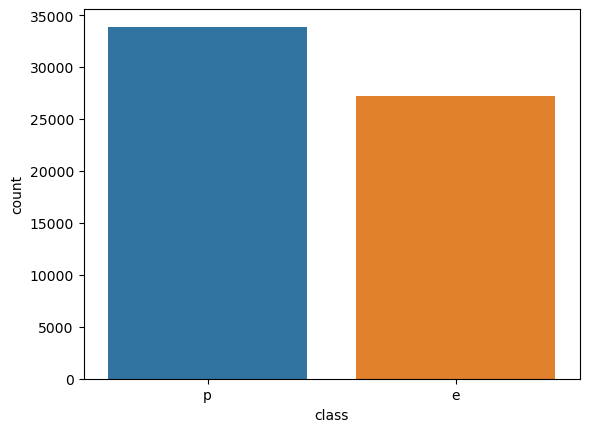

In [75]:
sns.countplot(x="class", data = df)


#### There's some data imbalance in the target variable. 

# Separate the numerical and categocal features

In [76]:

df_numerical_features = df.select_dtypes(exclude='object')
df_categorical_features = df.select_dtypes(include='object')

print(df_categorical_features)


      class cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         p         x           g         o                    f   
1         p         x           g         o                    f   
2         p         x           g         o                    f   
3         p         f           h         e                    f   
4         p         x           h         o                    f   
...     ...       ...         ...       ...                  ...   
61064     p         s           s         y                    f   
61065     p         f           s         y                    f   
61066     p         s           s         y                    f   
61067     p         f           s         y                    f   
61068     p         s           s         y                    f   

      gill-attachment gill-spacing gill-color stem-root stem-surface  \
0                   e          NaN          w         s            y   
1                   e          NaN     

# EDA

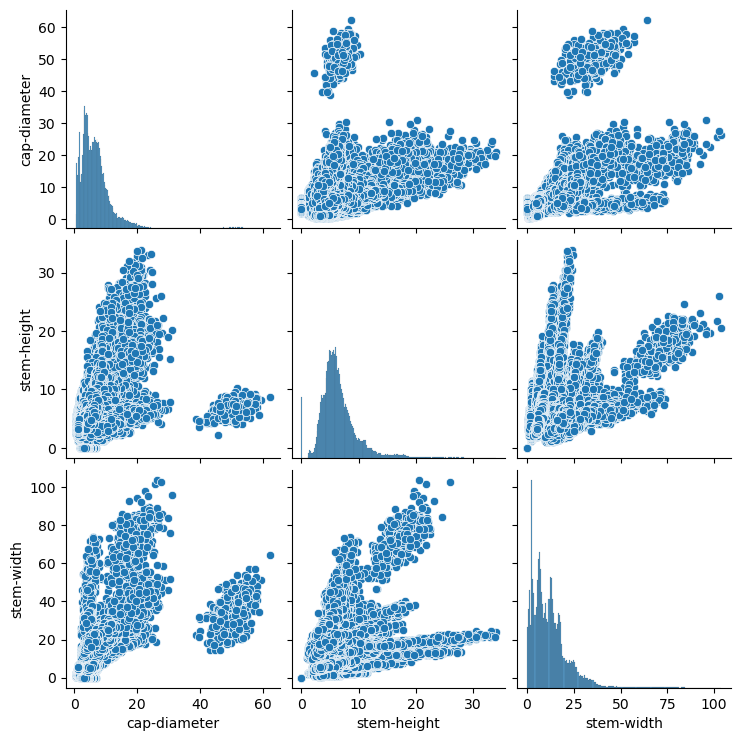

In [77]:
# Checks for colinearity on numerical variables 
sns.pairplot(df)


# Lets check the distributions with the histograms 

(array([3.1066e+04, 2.1029e+04, 6.3170e+03, 1.7610e+03, 3.8600e+02,
        1.8400e+02, 1.7500e+02, 1.1300e+02, 3.1000e+01, 7.0000e+00]),
 array([  0.   ,  10.391,  20.782,  31.173,  41.564,  51.955,  62.346,
         72.737,  83.128,  93.519, 103.91 ]),
 <BarContainer object of 10 artists>)

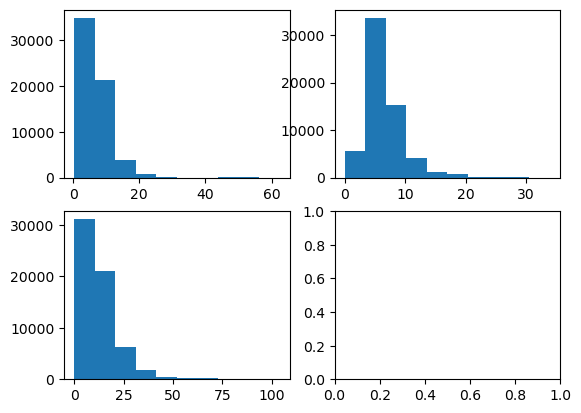

In [98]:
fig, axs = plt.subplots(2,2)

axs[0,0].hist(df["cap-diameter"])
axs[0,1].hist(df["stem-height"])
axs[1,0].hist(df["stem-width"])

# They are quite skewed, but make sense 
# specially for the diameter variables like cap-diameter and stem-width
# The more "normal", is stem height

In [100]:
## do we need barplots??? 

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1600x800 with 0 Axes>

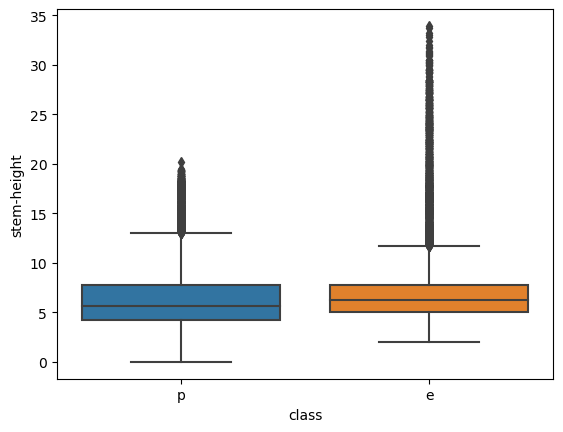

In [102]:
# Lets see the boxplots to check for outliers
### There are so many outliers they cannot be treated as outliers

sns.boxplot(x="class", y="stem-height", data = df)
plt.show()

In [104]:
## Check correlations to drop some column? 
### correlation matrix bewteen the numerical variables of the dataset

corr_data = df.select_dtypes([np.number])
correlation_matrix = corr_data.corr()
correlation_matrix

,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


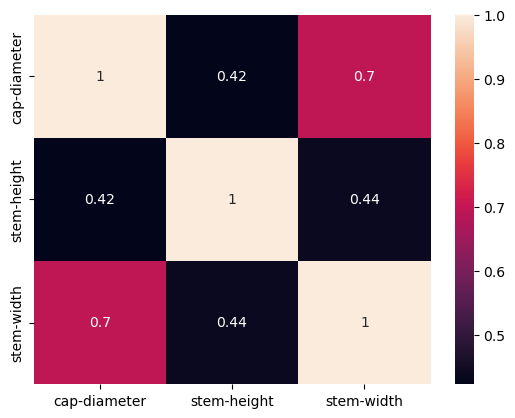

<Figure size 640x480 with 0 Axes>

In [105]:
sns.heatmap(correlation_matrix, annot=True)

plt.show()

plt.savefig("KnowYourMushrooms_heatmap.png", format='svg')

# Modelling - Machine learning 
## Random Forests ? 
This is a classification task, with a lot of variables (21)
Will try a random forest because I would guess that some features like cap-color could be more importnat or needed to pay attention to ...
